In [11]:
#Imports for the project: 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

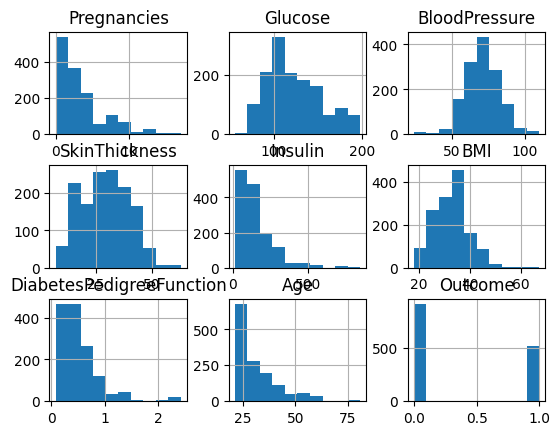

In [12]:
#Loading data and creating a test train split:

data=pd.read_csv("Diabetes.csv")
train_data, test_data = train_test_split(data, test_size=0.4, random_state=33)
data.hist()




In [13]:
print(train_data.head())
print(test_data.head())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1265          1.0     80.0           74.0           11.0     60.0  30.0   
306           2.0    106.0           64.0           35.0    119.0  30.5   
854           1.0    100.0           72.0           12.0     70.0  25.3   
562           7.0    150.0           66.0           42.0    342.0  34.7   
1156          9.0    134.0           74.0           33.0     60.0  25.9   

      DiabetesPedigreeFunction   Age  Outcome  
1265                     0.527  22.0      0.0  
306                      1.400  34.0      0.0  
854                      0.658  28.0      0.0  
562                      0.718  42.0      0.0  
1156                     0.460  81.0      0.0  
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
787           3.0     74.0           68.0           28.0     45.0  29.7   
290           9.0    134.0           74.0           33.0     60.0  25.9   
1021          1.0    181.0          

In [14]:
train_data_X = train_data.iloc[:,0:8].values
train_data_Y = train_data.iloc[:,8:9].values
test_data_X = test_data.iloc[:,0:8].values
test_data_Y= test_data.iloc[:,8:9].values

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from sklearn.preprocessing import MinMaxScaler
# Add a standard scalar
scaler = MinMaxScaler()

train_data_X = scaler.fit_transform(train_data_X)
test_data_X = scaler.fit_transform(test_data_X)

model = Sequential()

model.add(Dense(1024, activation="relu", input_shape=(train_data_X.shape[1],)))

model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.3))  

model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.3))


model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))

model.add(Dense(32, activation="relu"))





model.add(Dense(1, activation="sigmoid"))




model.summary()

c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1024)           │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,265 (3.71 MB)

 Trainable params: 971,265 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(train_data_X,train_data_Y, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6361 - loss: 0.6645 - val_accuracy: 0.7791 - val_loss: 0.5294
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7452 - loss: 0.5057 - val_accuracy: 0.7326 - val_loss: 0.4633
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7639 - loss: 0.5037 - val_accuracy: 0.8023 - val_loss: 0.4958
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7664 - loss: 0.4364 - val_accuracy: 0.7791 - val_loss: 0.3963
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8102 - loss: 0.4226 - val_accuracy: 0.8140 - val_loss: 0.3776
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8043 - loss: 0.4042 - val_accuracy: 0.8256 - val_loss: 0.3681
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8229 - loss: 0.4062 - val_accuracy: 0.8605 - val_loss: 0.3183
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8180 - loss: 0.3969 - val_accuracy: 0.8721 - v

# Testing and Saving the Model:
***

In [17]:
# Saving the Model: 
model.save('./saved_models/saved_model2.keras')



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,  confusion_matrix

# Assuming test_data_X and test_data_Y are your test datasets
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data_X, test_data_Y)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict the outputs
predictions = model.predict(test_data_X)
predicted_labels = np.argmax(predictions, axis=1)

# Assuming test_data_Y contains true labels
true_labels = np.argmax(test_data_Y, axis=1)  # Only necessary if your labels are one-hot encoded

# Generate and print classification report
report = classification_report(true_labels, predicted_labels)
print(report)



from sklearn.svm import SVC

svc = SVC()
svc.fit(train_data_X, train_data_Y)

print("Accuracy on training set: {:.2f}".format(svc.score(train_data_X,train_data_Y)))
print("Accuracy on test set: {:.2f}".format(svc.score(test_data_X, test_data_Y)))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3136 
Test Loss: 0.3515526354312897
Test Accuracy: 0.8578947186470032
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       570

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570

Accuracy on training set: 0.85
Accuracy on test set: 0.79


c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Epochs vs Loss
***

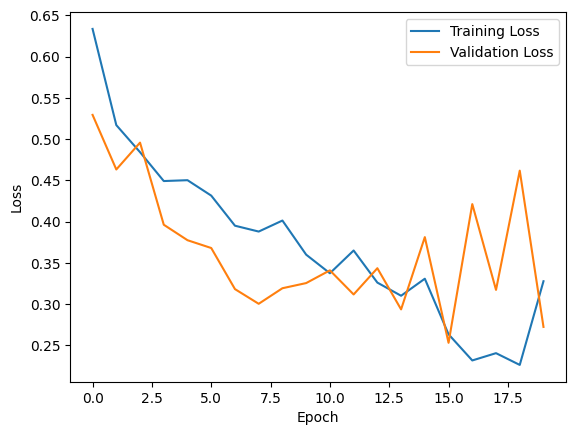

In [19]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Epoch vs Accuracy:
***

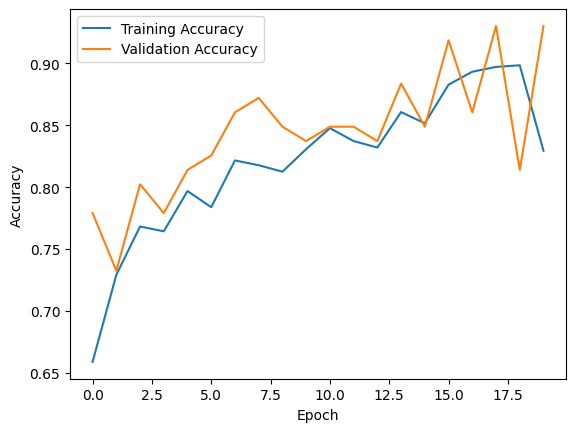

In [20]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
file_path = './Diabetes.csv'  # Update the file path if necessary
diabetes_data = pd.read_csv(file_path)

# Separate features and target
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a more complex neural network model
model = Sequential([
    Dense(128, input_dim=8, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/200


c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6717 - loss: 0.5974 - val_accuracy: 0.7632 - val_loss: 0.4755
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.4655 - val_accuracy: 0.7807 - val_loss: 0.4513
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7849 - loss: 0.4491 - val_accuracy: 0.8026 - val_loss: 0.4324
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.4085 - val_accuracy: 0.8202 - val_loss: 0.4059
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8030 - loss: 0.3993 - val_accuracy: 0.8202 - val_loss: 0.3916
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8261 - loss: 0.3925 - val_accuracy: 0.8289 - val_loss: 0.3743
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.4221 - val_accuracy: 0.8465 - val_loss: 0.3552
Epoch 8/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8114 - loss: 0.4292 - val_accuracy: 0.8553 - val_loss: 0.3

In [26]:
model.save('./saved_models/gpt.keras')

In [44]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('./saved_models/saved_model2.keras')

# Assuming these are the features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

features = [100,100,100,0.0,400,19.6,22,40]


# Convert the list of features into a 2D NumPy array with shape (1, number_of_features)
features_array = np.array([features])  # Notice the extra brackets to create a 2D array with one row    
print(type(features_array))
# Make a prediction
prediction = model.predict(features_array)
prediction_val = prediction[0][0]
print(features_array)
print(prediction)
print(prediction_val)
if prediction_val == 1.0:
    print("Im sorry my friend, you have diabetes")
else:
    print("Yipee!, no diabetes detected")

<class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[100.  100.  100.    0.  400.   19.6  22.   40. ]]
[[0.]]
0.0
Yipee!, no diabetes detected
